In [97]:
import numpy as np
from scipy.io import loadmat
from scipy.fftpack import fft
from scipy.signal import welch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [76]:
# Funciones auxiliares para levantar data
def armarNombre(x):
    c = 'S' if x < 11 else 'P'
    x = (x-1)%10+1
    return str(c) + ("" if x == 10 else "0") + str(x)

def armarNombreArchivo(c, x):
    return "data/" + str(c) + ("" if x == 10 else "0") + str(x) + ".mat"

In [58]:
# Funcion auxiliar para pasar valores de frecuencia a bines
#    Delta < 4 Hz
#    4 Hz <= Theta < 8 Hz
#    8 Hz <= Alpha < 13 Hz
#    13 Hz <= Beta < 30 Hz
#    30 Hz <= Gamma < Nyquist

def bin_de_frecuencia(x):
    x *= 1000
    if x < 4.:
        return 0
    elif x < 8.:
        return 1
    elif x < 13.:
        return 2
    elif x < 30.:
        return 3
    else:
        return 4
    
def agrupar_por_bines(potencias, frecuencias):
    res = np.zeros(5)
    for i in range(len(potencias)):
        res[bin_de_frecuencia(frecuencias[i])] += potencias[i]
    return res

In [75]:
pacientes_promediados = []
## Levantar toda la data y guardar los promedios segun epoch
for (num, c) in enumerate((['S','P'])):
    for i in range(10):
        nombre = armarNombreArchivo(c, i + 1)
        print("Cargando data de: " + nombre)
        paciente = (loadmat(nombre)['data'])
        pacientes_promediados.append(np.zeros_like(paciente[0]))
        
        for epoch in paciente:
            pacientes_promediados[num*10 + i] += epoch
        pacientes_promediados[num*10 + i]/=len(paciente)

Cargando data de: data/S01.mat
Cargando data de: data/S02.mat
Cargando data de: data/S03.mat
Cargando data de: data/S04.mat
Cargando data de: data/S05.mat
Cargando data de: data/S06.mat
Cargando data de: data/S07.mat
Cargando data de: data/S08.mat
Cargando data de: data/S09.mat
Cargando data de: data/S10.mat
Cargando data de: data/P01.mat
Cargando data de: data/P02.mat
Cargando data de: data/P03.mat
Cargando data de: data/P04.mat
Cargando data de: data/P05.mat
Cargando data de: data/P06.mat
Cargando data de: data/P07.mat
Cargando data de: data/P08.mat
Cargando data de: data/P09.mat
Cargando data de: data/P10.mat


/usr/lib/python3/dist-packages/scipy/signal/spectral.py:278: UserWarning: nperseg = 256, is greater than x.shape[-1] = 201, using nperseg = x.shape[-1]
  % (nperseg, axis, x.shape[axis], axis))


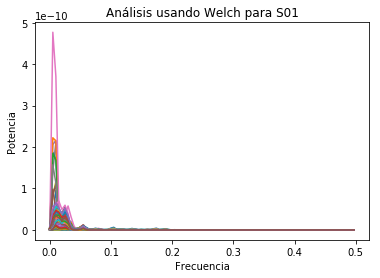

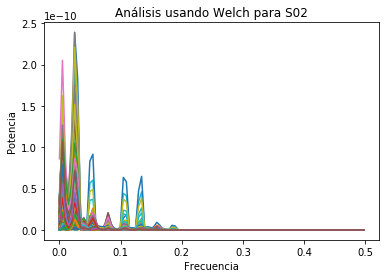

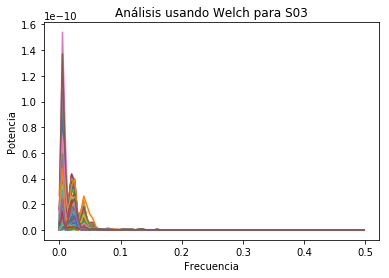

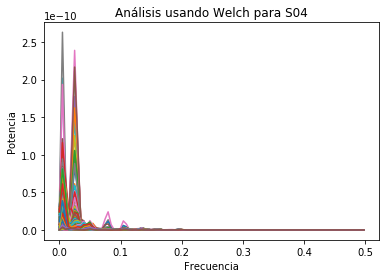

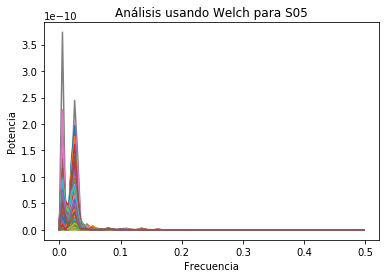

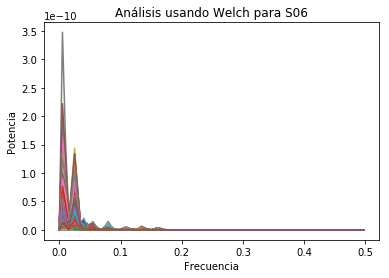

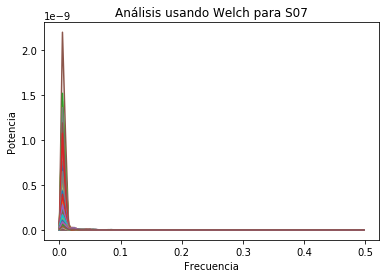

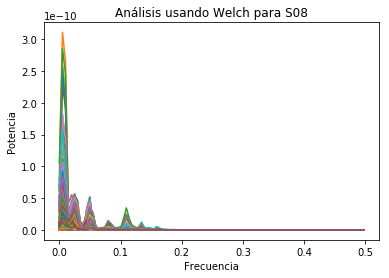

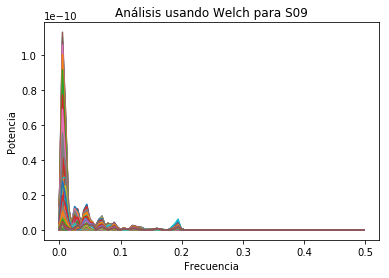

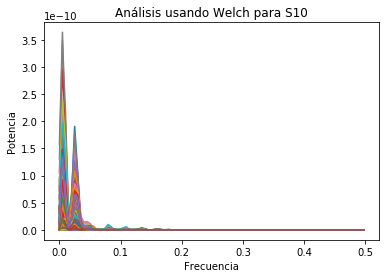

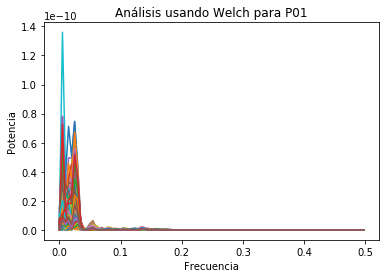

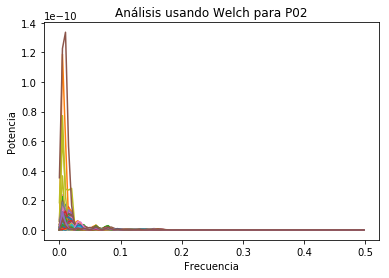

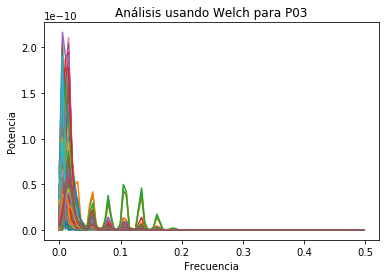

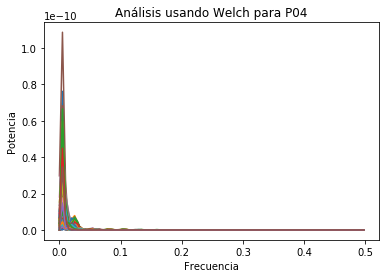

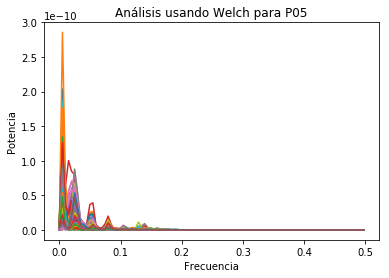

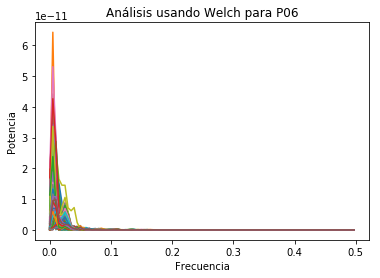

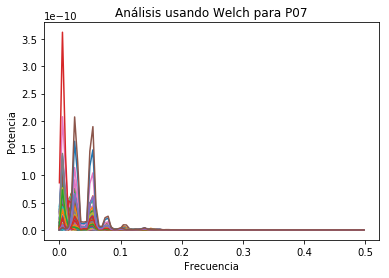

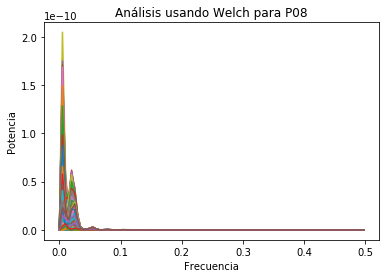

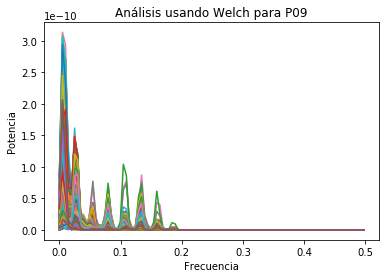

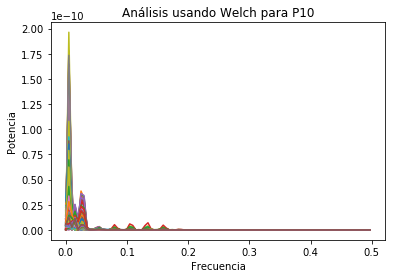

In [77]:
# Para guardar los bines de frecuencia de cada paciente
pacientes_frecuencias_por_bines = []
for paciente in pacientes_promediados:
    pacientes_frecuencias_por_bines.append(np.zeros(5))  # Son los bines de frecuencia

## Aca se hace welch

for (N, paciente_promediado) in enumerate(pacientes_promediados):
    paciente_welch = np.zeros((256,101))
    paciente_welch_frecuencias = np.zeros(101)
    for i in range(len(paciente_promediado)):
        paciente_welch_frecuencias = (welch(paciente_promediado[i]))[0]
        paciente_welch[i] = (welch(paciente_promediado[i]))[1]

        # En el mismo calculo binneo las potencias para todos los electrodos
        pacientes_frecuencias_por_bines[N] += agrupar_por_bines(paciente_welch[i], paciente_welch_frecuencias)
    pacientes_frecuencias_por_bines[N] /= 256.

    plt.clf()
    for line in paciente_welch:
        plt.plot(paciente_welch_frecuencias, line)
    plt.title("Análisis usando Welch para " + armarNombre(N+1))
    plt.xlabel("Frecuencia")
    plt.ylabel("Potencia")
    plt.show()

In [169]:
# Usa pacientes_frecuencias_por_bines
banda_alpha = {
    'valor': np.array([l[2] for l in pacientes_frecuencias_por_bines]),
    'tipo': ['S']*10 + ['P']*10,
    'numero': np.array(range(20))%10
}

df_banda_alpha = pd.DataFrame.from_dict(banda_alpha)

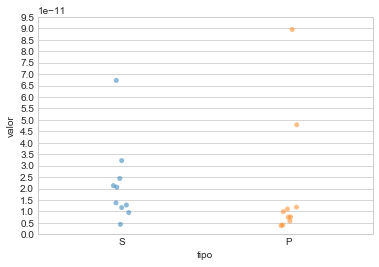

In [171]:
# stripplot
sns.stripplot(data = df_banda_alpha, x = 'tipo', y = 'valor', jitter=.05, alpha=.5)
limit = .0000000001
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(0,limit,step))
plt.show()

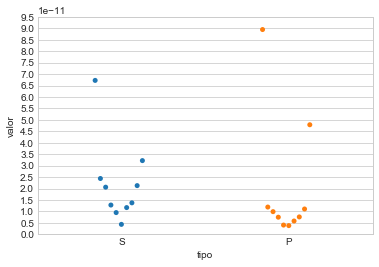

In [172]:
# swarmplot
sns.swarmplot(data = df_banda_alpha, x = 'tipo', y = 'valor')
limit = .0000000001
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(0,limit,step))
plt.show()

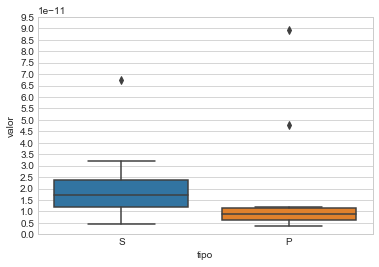

In [173]:
# boxplot
sns.boxplot(data = df_banda_alpha, x = 'tipo', y = 'valor')
limit = .0000000001
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(0,limit,step))
plt.show()

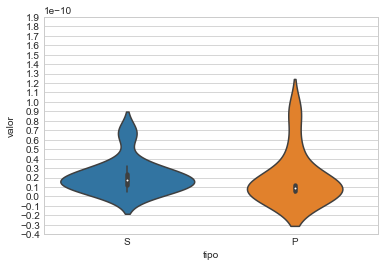

In [174]:
# violinplot
sns.violinplot(data = df_banda_alpha, x = 'tipo', y = 'valor')
limit = .0000000002
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(-limit/5,limit,step))
plt.show()

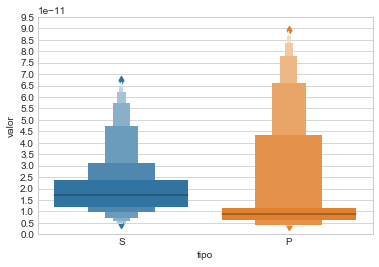

In [175]:
# lvplot
sns.lvplot(data = df_banda_alpha, x = 'tipo', y = 'valor')
limit = .0000000001
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(0,limit,step))
plt.show()

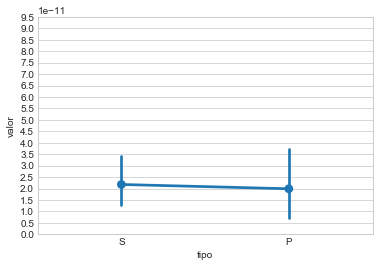

In [176]:
# pointplot
sns.pointplot(data = df_banda_alpha, x = 'tipo', y = 'valor')
limit = .0000000001
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(0,limit,step))
plt.show()

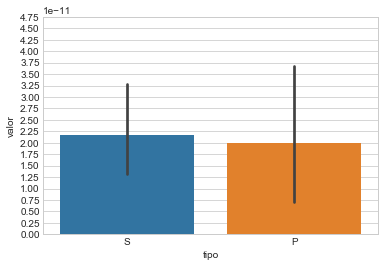

In [187]:
# barplot
sns.barplot(data = df_banda_alpha, x = 'tipo', y = 'valor')
limit = .00000000005
step = limit/20
plt.ylim(0, limit - step)
plt.yticks(np.arange(0,limit,step))
plt.show()

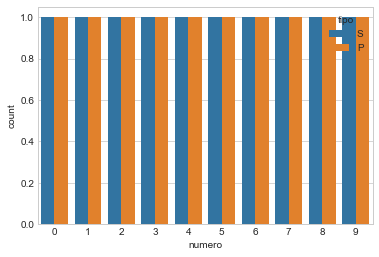

In [184]:
# countplot
limit = .0000000001
step = limit/20
sns.countplot(data = df_banda_alpha, x = 'numero', hue = 'tipo')
plt.show()